<a href="https://colab.research.google.com/github/aikssa/python_do_zero_ao_ds/blob/main/aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de preços de casas - Aula 03

*IMPORTANTE: para visualizar os mapas dinâmicos, clique em `Open in Colab` logo acima.*

# Importação das bibliotecas e dos dados

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from IPython.display import Image

In [2]:
# retirando as notações científicas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# mostrando todas as linhas
pd.set_option('display.max_rows', None)

In [3]:
# carregando o dataset
df = pd.read_csv('/content/drive/MyDrive/repos/python_do_zero_ao_ds/datasets/kc_house_data.csv')

# verificando as 5 primeiras linhas do dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


# Respondendo questões de negócio

## Q1: Qual o número de imóveis por ano de construção?

In [4]:
# agrupando os dados pelo ano de construção para fazer a contagem
df[['id', 'yr_built']].groupby('yr_built').count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
1905,74
1906,92
1907,65
1908,86


## Q2: Qual o menor número de quartos por ano de construção de imóveis?

In [5]:
# agrupando os dados para verificar a quantidade mínima de quartos
df[['bedrooms', 'yr_built']].groupby('yr_built').min()

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
1905,1
1906,1
1907,1
1908,1


## Q3: Qual o preço de compra mais alto por cada número de quarto?

In [6]:
# agrupando os dados para verificar o maior preço pelo número de quartos
df[['price', 'bedrooms']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.00
1,1247000.00
2,3278000.00
3,3800000.00
4,4489000.00
5,7062500.00
6,7700000.00
7,3200000.00
8,3300000.00


## Q4: Qual a soma de todos os preços de compra por número de quartos?

In [7]:
# agrupando os dados para verificar a soma dos preços pelo número de quartos
df[['price', 'bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5323550.00
1,63210934.00
2,1107788602.00
3,4580263939.00
4,4372957028.00
5,1259346326.00
6,224541613.00
7,36145017.00
8,14366000.00


Embora os maiores preços isolados sejam dos imóveis com 5 e 6 quartos, os maiores somatórios de preços são dos imóveis com 3 e 4 quartos, o que significa que existem outros fatores que influencima no preço, como a localização e qualidade do imóvel.

## Q5: Qual a soma de todos os preços de compra por número de quartos e banheiros?

In [8]:
# agrupando os dados para verificar a soma dos preços pelo número de quartos e banheiros
df[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum()

price
bedrooms bathrooms              
0        0.00         3642600.00
         0.75          265000.00
         1.00          228000.00
         1.50          288000.00
         2.50          899950.00
1        0.00          839000.00
         0.50          255000.00
         0.75         6778450.00
         1.00        43694934.00
         1.25         1763500.00
         1.50         3908950.00
         1.75         1464200.00
         2.00         1783000.00
         2.25         1744900.00
         2.50          979000.00
2        0.50          382000.00
         0.75         8515351.00
         1.00       542297424.00
         1.25         1406950.00
         1.50       120575703.00
         1.75       143259595.00
         2.00        96844945.00
         2.25        61083264.00
         2.50       106556678.00
         2.75        11018842.00
         3.00         8379650.00
         3.25         6933200.00
         3.50          535000.00
3        0.75         4984201.00
         1.00       598408675.00
         1.25         2420500.00
         1.50       330098904.00
         1.75       814396658.00
         2.00       468949131.00
         2.25       525264833.00
         2.50      1219588146.00
         2.75       177977194.00
         3.00       137225819.00
         3.25       140625098.00
         3.50       113443030.00
         3.75        15422600.00
         4.00        12668000.00
         4.25        10106150.00
         4.50         8685000.00
4        0.50          312500.00
         0.75          662500.00
         1.00       127128723.00
         1.50       112362964.00
         1.75       352314065.00
         2.00       249462431.00
         2.25       415407291.00
         2.50      1455709408.00
         2.75       420887477.00
         3.00       234059206.00
         3.25       281538935.00
         3.50       393349682.00
         3.75       101730616.00
         4.00        77074010.00
         4.25        60567790.00
         4.50        44919910.00
         4.75        11197990.00
         5.00        12441530.00
         5.25         8115000.00
         5.50        11775000.00
         5.75         1940000.00
5        1.00        21209082.00
         1.50        21803990.00
         1.75        65804785.00
         2.00        54954450.00
         2.25        76428068.00
         2.50       175781842.00
         2.75       141885906.00
         3.00       118241055.00
         3.25       131455548.00
         3.50       151988257.00
         3.75        55468550.00
         4.00        62900750.00
         4.25        34223240.00
         4.50        52449213.00
         4.75        24147100.00
         5.00        15438800.00
         5.25        12141800.00
         5.50        12208000.00
         5.75         7490000.00
         6.00        10231000.00
         6.25         6188000.00
         6.50         2238890.00
         6.75         4668000.00
6        1.00         3545000.00
         1.50         1956400.00
         1.75         8644000.00
         2.00        11083200.00
         2.25        10599000.00
         2.50        17255170.00
         2.75        25873550.00
         3.00        28113940.00
         3.25        10128350.00
         3.50        14947160.00
         3.75        10475694.00
         4.00        10715750.00
         4.25        12365000.00
         4.50        20822899.00
         4.75         7960000.00
         5.00         6773000.00
         5.25         2218500.00
         6.00         5300000.00
         6.50         1180000.00
         7.75         6885000.00
         8.00         7700000.00
7        1.00          291000.00
         1.50          885000.00
         2.25         1909000.00
         2.50          879000.00
         2.75         2060000.00
         3.00         3655000.00
         3.25          419000.00
         3.50         5010000.00
         3.75         1663160.00
         4.00         3449957.00
         4.25         3274000.00
 

## Q6: Qual o tamanho médio das salas dos imóveis por ano de construção?

In [9]:
# agrupando os dados para verificar o tamanho médio por ano de construção
df[['sqft_living', 'yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732.01
1901,1763.62
1902,1919.63
1903,1507.74
1904,1603.18
1905,1965.81
1906,1802.23
1907,1904.28
1908,1699.64


## Q7: Qual o tamanho mediano das salas dos imóveis por ano de construção?

In [10]:
# agrupando os dados para verificar o tamanho mediano pelo ano de construção
df[['sqft_living', 'yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900,1540.00
1901,1610.00
1902,1600.00
1903,1505.00
1904,1280.00
1905,1865.00
1906,1600.00
1907,1700.00
1908,1575.00


## Q8: Qual o desvio padrão do tamanho das salas dos imóveis por ano de construção?

In [11]:
# agrupando os dados para verificar o desvio padrão
df[['sqft_living', 'yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900,732.94
1901,668.23
1902,878.66
1903,469.72
1904,1076.87
1905,890.84
1906,961.13
1907,946.17
1908,696.23


## Q9: Como é o crescimento médio de compras dos imóveis por ano, por dia e pela semana do ano?

- crescimento total dos preços por ano

In [12]:
# criando uma coluna para receber apenas os anos 
df['year'] = pd.to_datetime(df['date']).dt.year

# agrupando as vendas por ano
by_year = df[['price', 'year']].groupby('year').sum().reset_index()

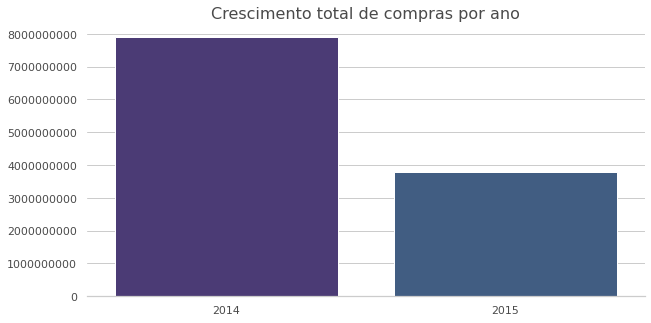

In [13]:
# definindo o estilo dos gráficos
sns.set_theme(style='whitegrid', palette='viridis')
palette = 'viridis'
title = {'size':16, 'color':'#4a4a4a'}
labels = {'size':14, 'color':'#4a4a4a'}
ticks = '#4a4a4a'

# definindo o tamanho do gráfico
plt.figure(figsize=(10, 5))

# plotando o gráfico
sns.barplot(data=by_year, x='year', y='price')

# título do gráfico
plt.title('Crescimento total de compras por ano', fontdict=title)

# label dos eixos
plt.xlabel('')
plt.ylabel('')

# alterando a cor dos eixos
plt.xticks(color=ticks)
plt.yticks(color=ticks)

# retirando a margem
sns.despine(left=True)

# retirando a notação científica
plt.ticklabel_format(style='plain', axis='y', useOffset=None)

# plotando o gráfico
plt.show();

- crescimento médio de compras dos imóveis por dia

In [14]:
# criando a coluna com os dias 
df['day'] = pd.to_datetime(df['date'])

# agrupando os dados
by_day = df[['price', 'day']].groupby('day').mean().reset_index()

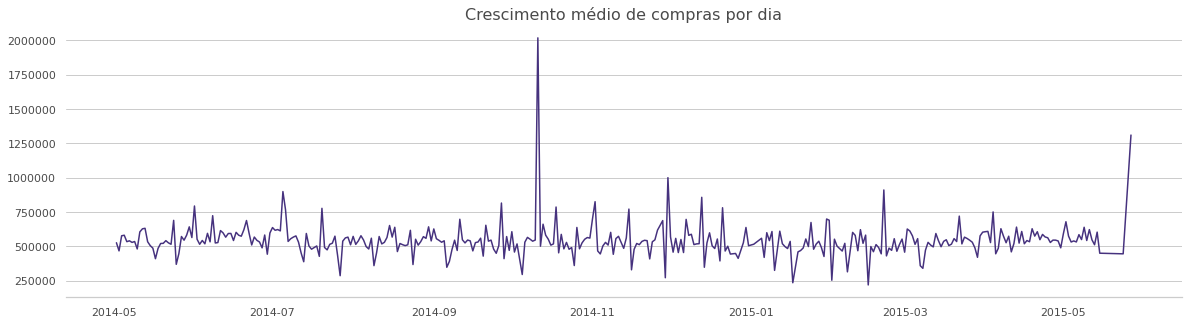

In [15]:
# definindo o tamanho do gráfico
plt.figure(figsize=(20, 5))

# criando o gráfico
sns.lineplot(x=by_day['day'], y=by_day['price'])

# título do gráfico
plt.title('Crescimento médio de compras por dia', fontdict=title)

# label dos eixos
plt.xlabel('')
plt.ylabel('')

# alterando a cor dos eixos
plt.xticks(color=ticks)
plt.yticks(color=ticks)

# retirando a margem e o grid vertical
sns.despine(left=True)
plt.grid(axis='x')

# retirando a notação científica
plt.ticklabel_format(style='plain', axis='y', useOffset=None)

# plotando o gráfico
plt.show();

- crescimento médio de compras dos imóveis pela semana do ano

In [16]:
# criando a coluna por semana
df['year_week'] = pd.to_datetime(df['date']).dt.strftime('%Y-%U')

# agrupando os dados
by_week = df[['price', 'year_week']].groupby('year_week').mean().reset_index()

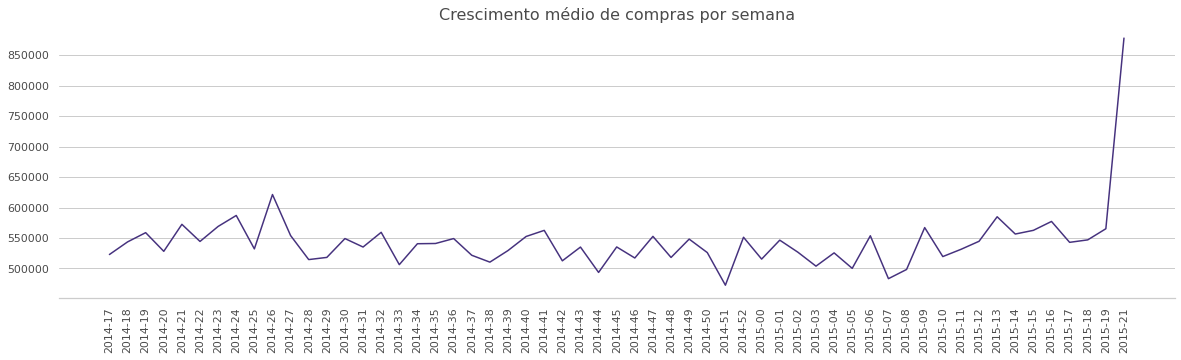

In [17]:
# definindo o tamanho do gráfico
plt.figure(figsize=(20, 5))

# criando o gráfico
sns.lineplot(x=by_week['year_week'], y=by_week['price'])

# título do gráfico
plt.title('Crescimento médio de compras por semana', fontdict=title)

# label dos eixos
plt.xlabel('')
plt.ylabel('')

# alterando a cor dos eixos
plt.xticks(color=ticks)
plt.yticks(color=ticks)

# rotacionando as labels do eixo x
plt.tick_params(rotation=90, axis='x')

# retirando a margem e o grid vertical
sns.despine(left=True)
plt.grid(axis='x')

# plotando o gráfico
plt.show();

## Q10: Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

In [18]:
# selecionando as colunas necessárias para o mapa
df_mapa = df[['id', 'price', 'lat', 'long']]

# criando o mapa
mapa_preco = px.scatter_mapbox(data_frame=df_mapa,
                               lat='lat',
                               lon='long',
                               color='price',
                               hover_name='id',
                               hover_data=['price'],
                               size='price',
                               color_continuous_scale=px.colors.sequential.Viridis,
                               size_max=30,
                               zoom=10,
                               mapbox_style='open-street-map',
                               height=600)

# definindo as margens
mapa_preco.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})

# plotando o mapa
mapa_preco.show()

In [19]:
# salvando o mapa em html
mapa_preco.write_html('/content/drive/MyDrive/repos/python_do_zero_ao_ds/aula_03/mapa_preco.html')

## Q11: Crie uma nova coluna chamada: dormitory_type
- Se o valor da coluna 'bedrooms' for igual à 1 = 'studio'
- Se o valor da coluna 'bedrooms' for igual a 2 = 'apartament'
- Se o valor da coluna 'bedrooms' for maior que 2 = 'house'

In [20]:
# criando uma nova coluna
df['dormitory_type'] = 'no bedroom'

# atribuindo os valores
df.loc[df['bedrooms'] == 1, 'dormitory_type'] = 'studio'
df.loc[df['bedrooms'] == 2, 'dormitory_type'] = 'apartament'
df.loc[df['bedrooms'] > 2, 'dormitory_type'] = 'house'

# verificando o resultado
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day,year_week,dormitory_type
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,2014,2014-10-13,2014-41,house
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,2014,2014-12-09,2014-49,house
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,2015,2015-02-25,2015-08,apartament
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,2014,2014-12-09,2014-49,house
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,2015,2015-02-18,2015-07,house


## Q12: Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

In [21]:
# agrupando os dados
by_bedrooms = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

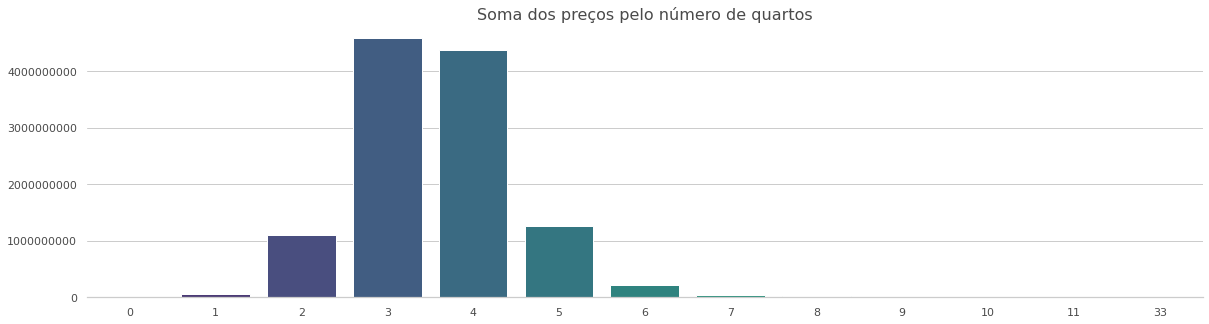

In [22]:
# definindo o tamanho do gráfico
plt.figure(figsize=(20, 5))

# criando o gráfico
sns.barplot(data=by_bedrooms, x='bedrooms', y='price', palette=palette)

# título do gráfico
plt.title('Soma dos preços pelo número de quartos', fontdict=title)

# label dos eixos
plt.xlabel('')
plt.ylabel('')

# alterando a cor dos eixos
plt.xticks(color=ticks)
plt.yticks(color=ticks)

# retirando a margem
sns.despine(left=True)

# retirando a notação científica
plt.ticklabel_format(style='plain', axis='y', useOffset=None)

# plotando o gráfico
plt.show();

## Q13: Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis.

In [23]:
# agrupando os dados
by_yrbuilt = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

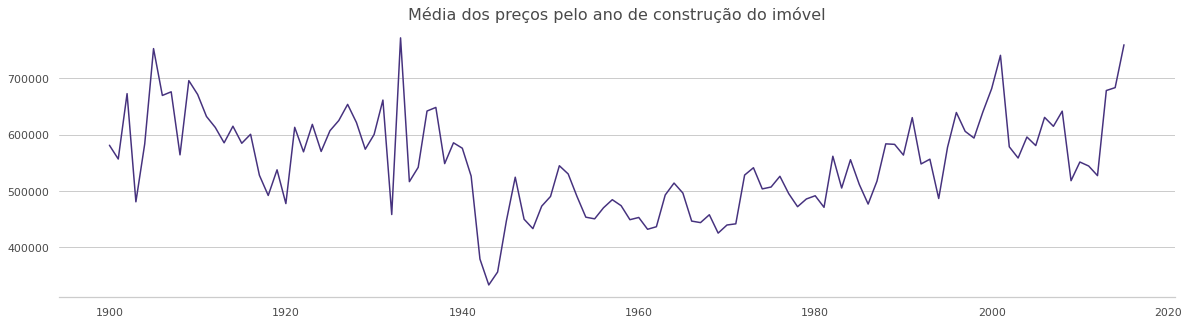

In [24]:
# definindo o tamanho do gráfico
plt.figure(figsize=(20, 5))

# criando o gráfico
sns.lineplot(x=by_yrbuilt['yr_built'], y=by_yrbuilt['price'])

# título do gráfico
plt.title('Média dos preços pelo ano de construção do imóvel', fontdict=title)

# label dos eixos
plt.xlabel('')
plt.ylabel('')

# alterando a cor dos eixos 
plt.xticks(color=ticks)
plt.yticks(color=ticks)

# retirando a margem e o grid vertical
sns.despine(left=True)
plt.grid(axis='x')

# plotando o gráfico
plt.show();

## Q14: Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

In [25]:
# agrupando os dados
by_dtype = df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index().sort_values('price', ascending=True)

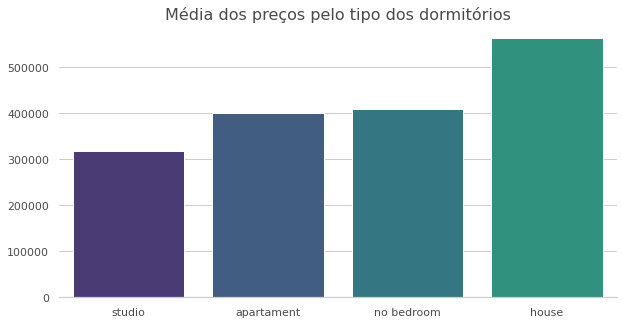

In [26]:
# definindo o tamanho do gráfico
plt.figure(figsize=(10, 5))

# criando o gráfico
sns.barplot(data=by_dtype, x='dormitory_type', y='price')

# título do gráfico
plt.title('Média dos preços pelo tipo dos dormitórios', fontdict=title)

# label dos eixos
plt.xlabel('')
plt.ylabel('')

# alterando a cor dos eixos
plt.xticks(color=ticks)
plt.yticks(color=ticks)

# retirando a margem
sns.despine(left=True)

# plotando o gráfico
plt.show();

## Q15: Faça um gráfico de linhas que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

In [27]:
# selecionando apenas as linhas com ano de reforma a partir de 1930
df_1930 = df.loc[df['yr_renovated'] > 1930]

# agrupando os dados
by_1930 = df_1930[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()

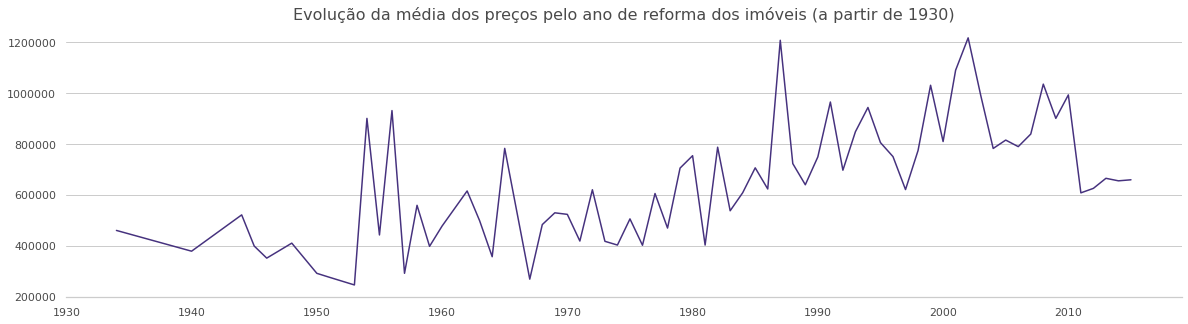

In [28]:
# definindo o tamanho do gráfico
plt.figure(figsize=(20, 5))

# criando o gráfico
sns.lineplot(x=by_1930['yr_renovated'], y=by_1930['price'])

# título do gráfico
plt.title('Evolução da média dos preços pelo ano de reforma dos imóveis (a partir de 1930)', fontdict=title)

# label dos eixos
plt.xlabel('')
plt.ylabel('')

# alterando a cor dos eixos
plt.xticks(color=ticks)
plt.yticks(color=ticks)

# retirando a margem e o grid vertical
sns.despine(left=True)
plt.grid(axis='x')

# retirando a notação científica
plt.ticklabel_format(style='plain', axis='y', useOffset=None)

# plotando o gráfico
plt.show();

## Q16: Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitório dos imóveis.

In [29]:
# agrupando os dados
df[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean()

price
yr_built dormitory_type          
1900     apartament     589533.33
         house          584854.27
         studio         398944.00
1901     apartament     452856.40
         house          578619.17
1902     apartament     511850.00
         house          709634.09
1903     apartament     455959.20
         house          496985.29
         studio         170000.00
1904     apartament     450085.83
         house          672870.52
1905     apartament     470928.57
         house          842673.18
         studio         365000.00
1906     apartament     451517.08
         house          768908.36
         studio         393750.00
1907     apartament     461496.15
         house          755046.35
         studio         320000.00
1908     apartament     449093.95
         house          616400.23
         studio         375650.00
1909     apartament     456548.54
         house          787741.81
1910     apartament     457297.14
         house          777163.36
         studio         407325.00
1911     apartament     406766.67
         house          699393.86
         studio         356250.00
1912     apartament     436658.16
         house          678809.49
         studio          80000.00
1913     apartament     371405.56
         house          634136.94
         no bedroom     139950.00
1914     apartament     476289.88
         house          686693.24
         studio         190000.00
1915     apartament     394845.17
         house          683596.59
         studio         123950.00
1916     apartament     440620.83
         house          689228.62
         studio         352500.00
1917     apartament     353050.00
         house          603396.25
         studio         142500.00
1918     apartament     360088.46
         house          582014.24
         studio         346794.44
1919     apartament     404010.52
         house          615636.84
         studio         258500.00
1920     apartament     383228.85
         house          540232.52
         studio         285750.00
1921     apartament     422495.65
         house          698483.46
         studio         565000.00
1922     apartament     378857.14
         house          677924.90
         studio         296220.00
1923     apartament     429254.47
         house          774303.51
         studio         321666.67
1924     apartament     461053.15
         house          655506.25
         studio         389400.00
1925     apartament     431448.84
         house          670156.20
         studio         550000.00
1926     apartament     432173.26
         house          697159.39
         studio         184666.67
1927     apartament     492102.27
         house          701941.49
         studio         400000.00
1928     apartament     414245.65
         house          684073.69
         studio         271250.00
1929     apartament     435483.50
         house          602721.44
         studio         377000.00
1930     apartament     327729.41
         house          675958.28
         studio         237450.00
1931     apartament     479936.36
         house          710803.06
         studio         250000.00
1932     apartament     307166.67
         house          557046.09
1933     apartament     296714.29
         house          916717.39
1934     apartament     387650.00
         house          557121.88
1935     apartament     345141.43
         house          697716.07
         studio         276000.00
1936     apartament     476729.17
         house          743836.54
         studio         312450.00
1937     apartament     401210.53
         house          774847.17
         studio         278258.33
1938     apartament     375148.43
         house          666416.06
1939     apartament     409534.72
         house          711544.32
         studio         218620.00
1940     apartament     391751.64
         house          658572.38
         studio         373333.33
1941     apartament     381381.59
         house  

## Q17: Crie um dashboard com os gráficos das questões 12, 13 e 14 (dashboard: 1 linha e 2 colunas)

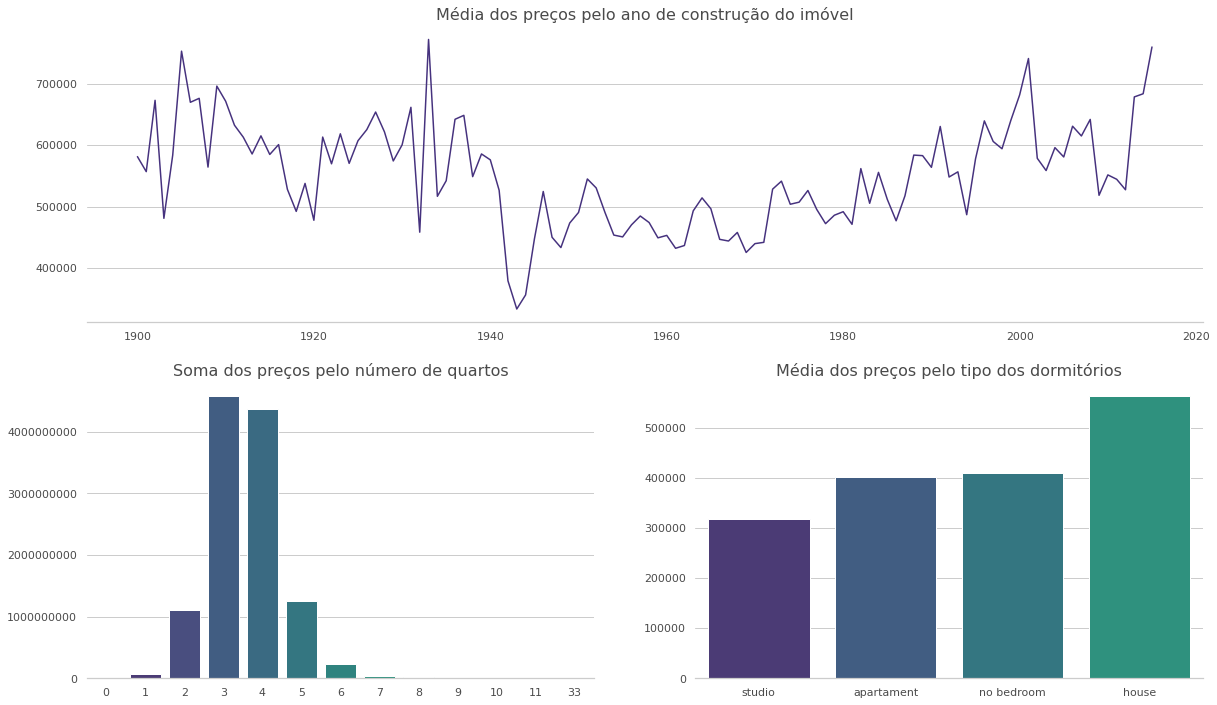

In [30]:
# criando o grid
fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

# espaçamento entre os gráficos
fig.tight_layout()

# criando os eixos
ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, 0])
ax3 = fig.add_subplot(specs[1, 1])

# primeiro gráfico
sns.lineplot(x=by_yrbuilt['yr_built'], y=by_yrbuilt['price'], ax=ax1)
ax1.set_title('Média dos preços pelo ano de construção do imóvel', fontdict=title)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(colors=ticks)
sns.despine(left=True)
ax1.grid(axis='x')

# segundo gráfico
sns.barplot(data=by_bedrooms, x='bedrooms', y='price', ax=ax2, palette=palette)
ax2.set_title('Soma dos preços pelo número de quartos', fontdict=title)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(colors=ticks)
ax2.ticklabel_format(style='plain', axis='y', useOffset=None)

# terceiro gráfico
sns.barplot(data=by_dtype, x='dormitory_type', y='price', ax=ax3)
ax3.set_title('Média dos preços pelo tipo dos dormitórios', fontdict=title)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.tick_params(colors=ticks)

# plotando o dashboard
plt.show();

## Q18: Crie um dashboard com os gráficos das perguntas 12 e 14 (dashboard: 2 colunas)

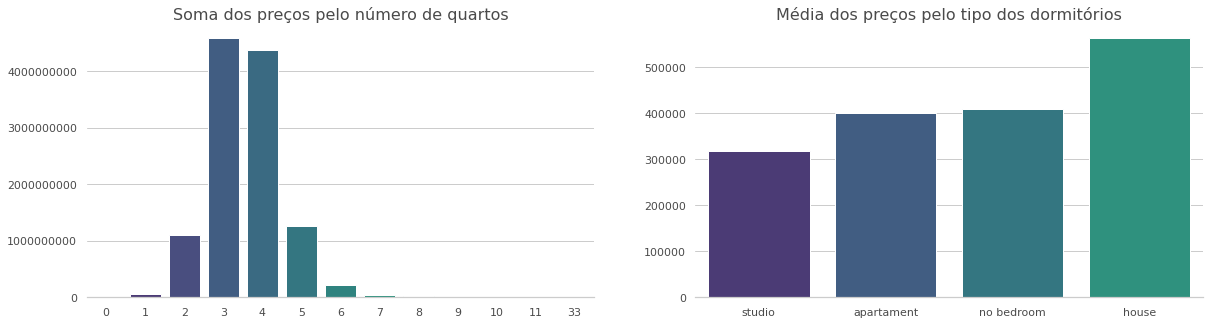

In [31]:
# criando o grid
fig = plt.figure(figsize=(20, 5))
specs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

# espaçamento entre os gráficos
fig.tight_layout()

# criando os eixos
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])

# primeiro gráfico
sns.barplot(data=by_bedrooms, x='bedrooms', y='price', ax=ax1, palette=palette)
ax1.set_title('Soma dos preços pelo número de quartos', fontdict=title)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(colors=ticks)
sns.despine(left=True)
ax1.ticklabel_format(style='plain', axis='y', useOffset=None)

# segundo gráfico
sns.barplot(data=by_dtype, x='dormitory_type', y='price', ax=ax2)
ax2.set_title('Média dos preços pelo tipo dos dormitórios', fontdict=title)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(colors=ticks)

# plotando o dashboard
plt.show();

## Q19: Crie um dashboard com os gráficos das perguntas 13 e 15 (dashboard: 2 linhas)

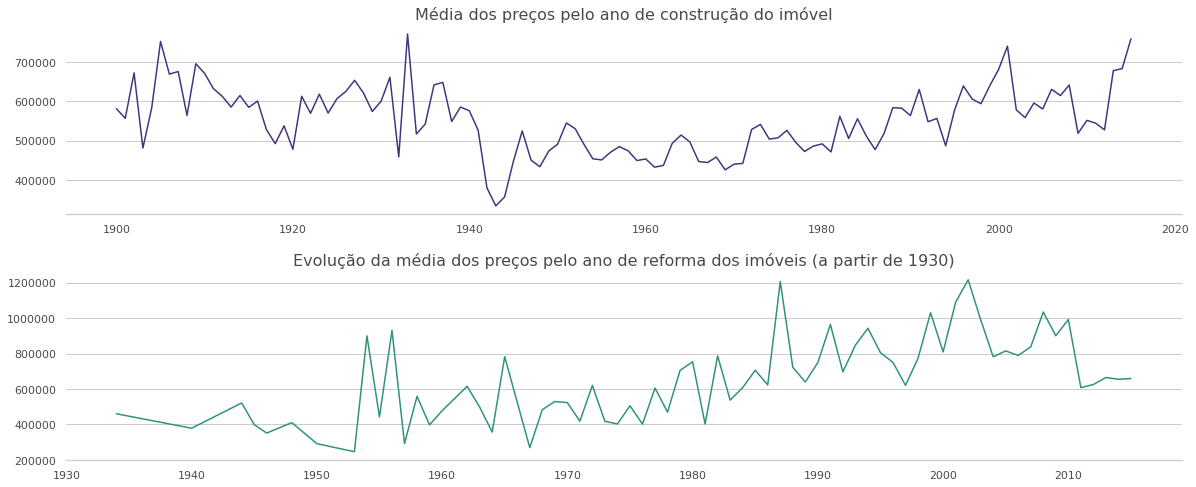

In [32]:
# criando o grid
fig = plt.figure(figsize=(20, 8))
specs = gridspec.GridSpec(nrows=2, ncols=1, figure=fig, hspace=0.3)

# espaçamento entre os gráficos
fig.tight_layout()

# criando os eixos
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[1, 0])

# primeiro gráfico
sns.lineplot(x=by_yrbuilt['yr_built'], y=by_yrbuilt['price'], ax=ax1)
ax1.set_title('Média dos preços pelo ano de construção do imóvel', fontdict=title)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(colors=ticks)
sns.despine(left=True)
ax1.grid(axis='x')

# segundo gráfico
sns.lineplot(x=by_1930['yr_renovated'], y=by_1930['price'], ax=ax2, color='#2f917e')
ax2.set_title('Evolução da média dos preços pelo ano de reforma dos imóveis (a partir de 1930)', fontdict=title)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(colors=ticks)
ax2.grid(axis='x')
ax2.ticklabel_format(style='plain', axis='y', useOffset=None)

# plotando o dashboard
plt.show();

## Q20: Faça um mapa com o tamanho dos pontos sendo igual ao tamanho da sala de estar.

In [33]:
# selecionando as colunas para criar o mapa
df_mapa_sala = df[['id', 'sqft_living', 'lat', 'long']]

# criando o mapa
mapa_sala = px.scatter_mapbox(data_frame=df_mapa_sala,
                              lat='lat',
                              lon='long',
                              color='sqft_living',
                              hover_name='id',
                              hover_data=['sqft_living'],
                              size='sqft_living',
                              color_continuous_scale=px.colors.sequential.Viridis,
                              size_max=30,
                              zoom=10,
                              mapbox_style='open-street-map',
                              height=600)

# definindo a margem
mapa_sala.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})

# mostrando o gráfico
mapa_sala.show()

In [34]:
# salvando o mapa em html
mapa_sala.write_html('/content/drive/MyDrive/repos/python_do_zero_ao_ds/aula_03/mapa_sala.html')